<a href="https://colab.research.google.com/github/ico1036/Nurion/blob/master/N02_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 각 데이터 샘플별 시각화 코드입니다 <br>
### REF: https://github.com/mickypaganini/susy_rpv/blob/micky/plots.ipynb

In [0]:
#!rm -r *

### Get sample

In [3]:
!git clone https://github.com/ico1036/Nurion.git

Cloning into 'Nurion'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 148 (delta 5), reused 12 (delta 5), pack-reused 133
Receiving objects: 100% (148/148), 99.14 MiB | 37.31 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [5]:
!ls -ahl Nurion/NurionHEP/

total 35M
drwxr-xr-x 2 root root 4.0K Aug  5 13:01 .
drwxr-xr-x 6 root root 4.0K Aug  5 13:01 ..
-rwxr-xr-x 1 root root 5.2K Aug  5 13:01 N01_split_data.py
-rw-r--r-- 1 root root 331K Aug  5 13:01 N02_Visualization.ipynb
-rw-r--r-- 1 root root  24M Aug  5 13:01 train.h5
-rw-r--r-- 1 root root  11M Aug  5 13:01 val.h5


In [0]:
import h5py

### Read and Open files

In [7]:
data = h5py.File('Nurion/NurionHEP/train.h5')
list(data.keys())

['all_events']

In [8]:
list(data['all_events'].keys()) 

['hist', 'histEM', 'histtrack', 'passSR', 'passSR4J', 'weights', 'y']

### -NERSC-

### These are the meanings of each branch:

**hist** :       the actual images <Br>
**histEM**:  the images at the em calo level<Br>
**histtrack**: the number of tracks in the eta-phi range of each cell<Br>
**normalized_weight**: normalized version of weight, below<br>
**numFatJet**: number of fat jets in that event<br>
**passSR**: did it pass all cuts?<br>
**passSR4J**: did it pass cuts for 4j signal region?<Br>
**passSR5J**: did it pass cuts for 5j signal region?<Br>
**sumFatJetM**: summ of mass of all fat jets in that event<br>
**weight**: cross section (mostly relevant for getting the JZ background samples to be comparable)<br>
 **y**: truth label



In [0]:
images = data['all_events']['hist'][:]
images_em = data['all_events']['histEM'][:]
images_track = data['all_events']['histtrack'][:]

labels = data['all_events']['y'][:]
weights = data['all_events']['weights'][:]
#norm_weights = data['all_events']['normalized_weight'][:n_events]


In [10]:
print(images.shape)
print(images_em.shape)
print(images_track.shape)

(14000, 64, 64)
(14000, 64, 64)
(14000, 64, 64)


In [0]:
labels=labels.flatten()

### Signal Background 의 shape, weight 출력 <br>
NERSC 의 ROOT --> HDF5 변형 코드에서는 디폴트로 Weight 를 다음과 같이 정의합니다.<br>
$$weight = cross section *  lumi(=36000pb^{-1})$$
<br>
https://github.com/eracah/atlas_dl/blob/master/scripts/prepare_data.py


In [12]:
print(images[labels==0].shape)
print(images[labels==1].shape)
print("BKG xsec*lumi: ", weights[labels==0][0])
print("Signal xsec*lumi:", weights[labels==1][0])

(7014, 64, 64)
(6986, 64, 64)
BKG xsec*lumi:  269100.0
Signal xsec*lumi: 6271.2


### Visualization

In [0]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline



In [0]:
matplotlib.rcParams.update({'font.size': 20})

In [0]:
def plot_image(image, vmin=None, vmax=None, weights=None):
    '''
    Args:
    -----
        image: ndarray with energies collected by each calo cell
        vmin: float, min energy to clip at
        vmax: float, max energy to clip at
    '''
    fig = plt.figure(figsize=(10,10))
    im = plt.imshow(image,
               interpolation='nearest',
               norm=LogNorm(vmin, vmax)
    )
    cbar = plt.colorbar(fraction=0.0455)
    cbar.set_label(r'Energy (MeV)', y=0.83)
    cbar.ax.tick_params()   
    plt.ylabel(r'$\eta$ Cell ID')
    plt.xlabel(r'$\phi$ Cell ID')

    plt.tight_layout()
    return im

### 첫번 째 이미지의 시각화입니다

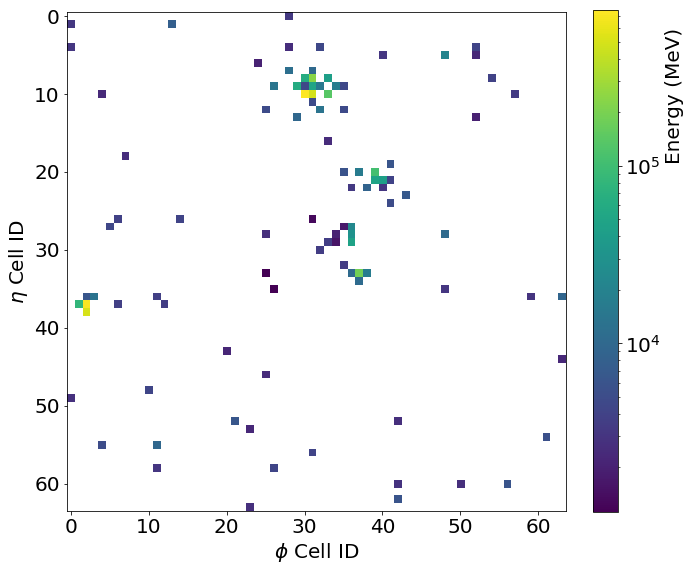

In [16]:
plot_image(images[0]) 

### Cross-section weighted first image 

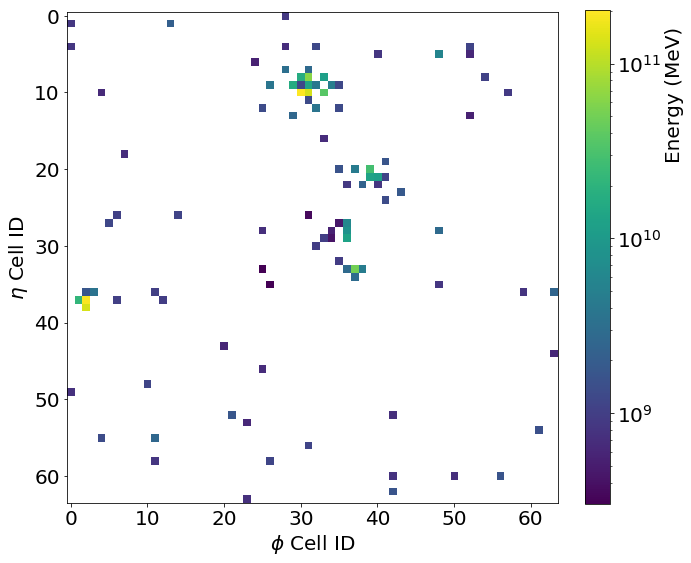

In [17]:
plot_image((weights[0]*images[0]))

## The HCAL images<br>

HCAL 이미지의 bkg, signal 입니다.<br>
weight가 곱해졌고, 전체의 평균값입니다

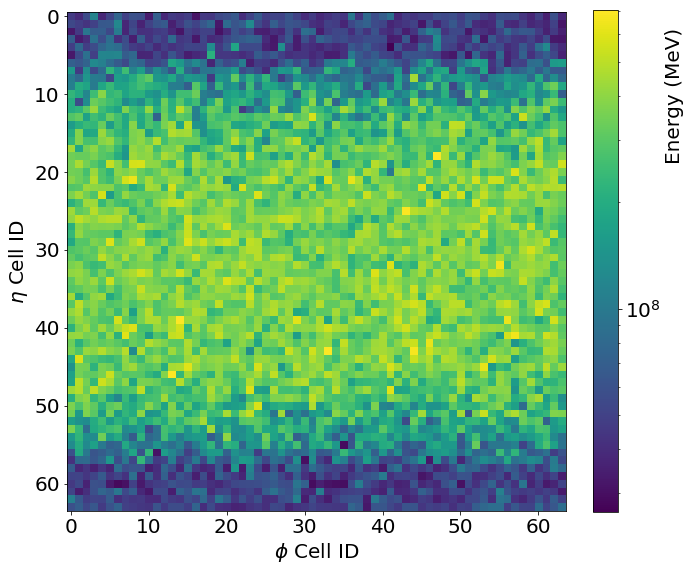

In [18]:
# -- average bkg
plot_image((weights.reshape(-1, 1, 1)*images)[labels==0].mean(axis=0))
#plot_image((images)[labels==0].mean(axis=0))

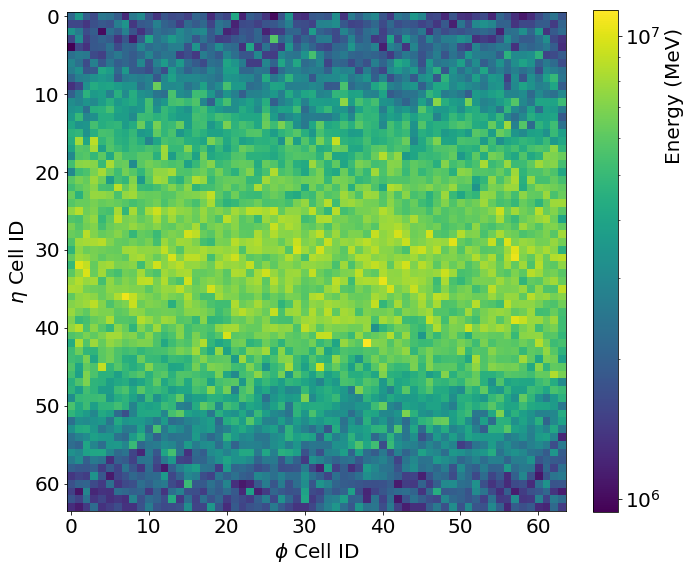

In [19]:
# -- average signal 
plot_image((weights.reshape(-1, 1, 1)*images)[labels==1].mean(axis=0))
#plot_image((images)[labels==1].mean(axis=0))



## ECAL images<br>
ECAL 이미지의 bkg, signal 입니다.<br>
weight가 곱해졌고, 전체의 평균값입니다

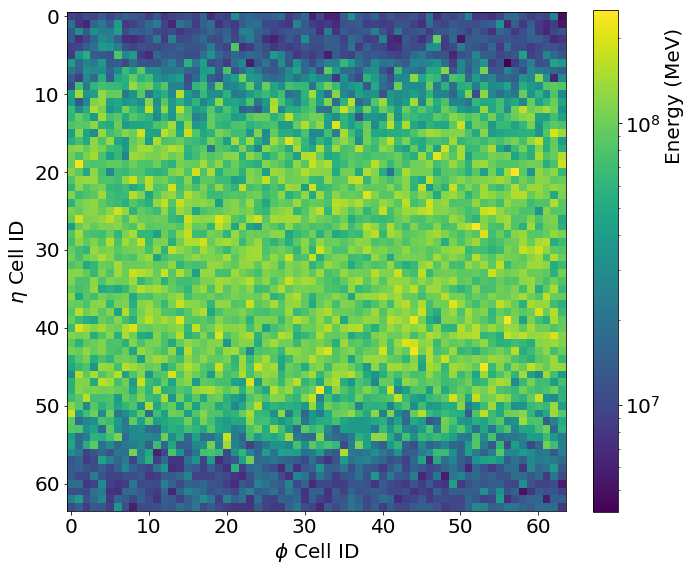

In [20]:
# -- average bkg
plot_image((weights.reshape(-1, 1, 1)*images_em)[labels==0].mean(axis=0))

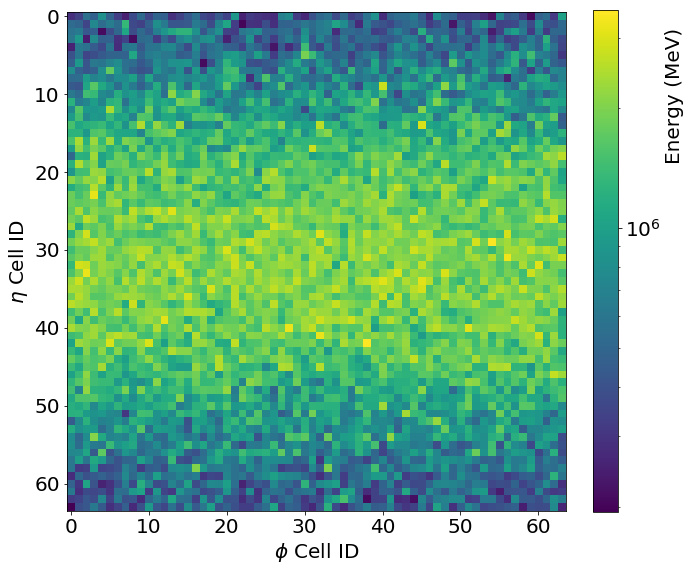

In [21]:
# -- average signal 
plot_image((weights.reshape(-1, 1, 1)*images_em)[labels==1].mean(axis=0))

## Tracker level images<br>
Tracker level 이미지의 bkg, signal 입니다.<br>
weight가 곱해졌고, 전체의 평균값입니다

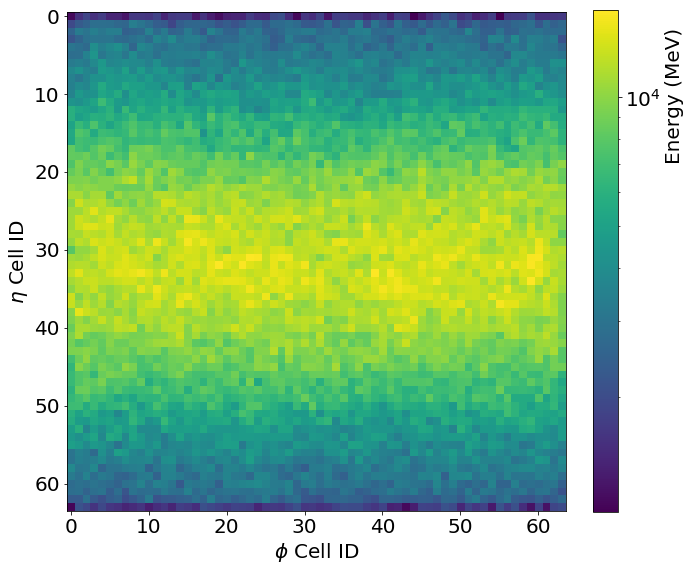

In [22]:
# -- average bkg
plot_image((weights.reshape(-1, 1, 1)*images_track)[labels==0].mean(axis=0))

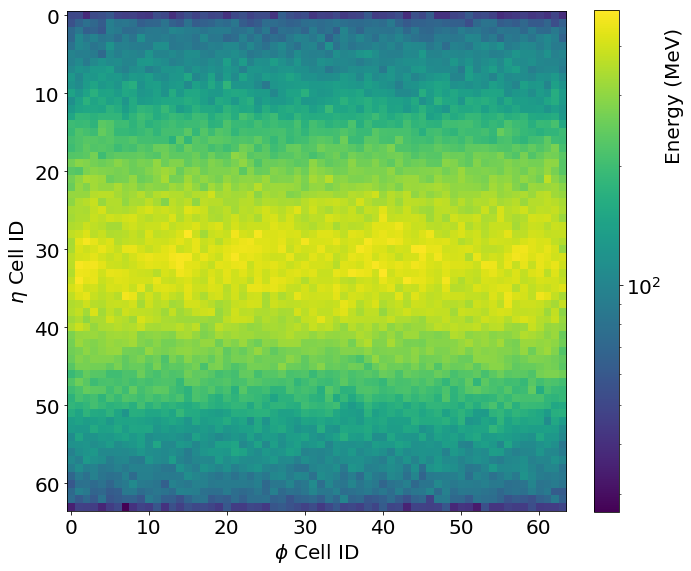

In [23]:
# -- average signal 
plot_image((weights.reshape(-1, 1, 1)*images_track)[labels==1].mean(axis=0))